## CSE 158 HW 1
### Christina Leung, A15468909

In [1]:
import numpy          # linear algebra
import urllib         # load data from the web
import scipy.optimize # optimization routines
import random         # random number generation
import ast
import matplotlib.pyplot as plt
from sklearn import linear_model

def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)
    
def parseDataFromFile(fname):
  for l in open(fname):
    #yield eval(l)
    yield ast.literal_eval(l)

data = list(parseDataFromFile("fantasy_10000.json"))

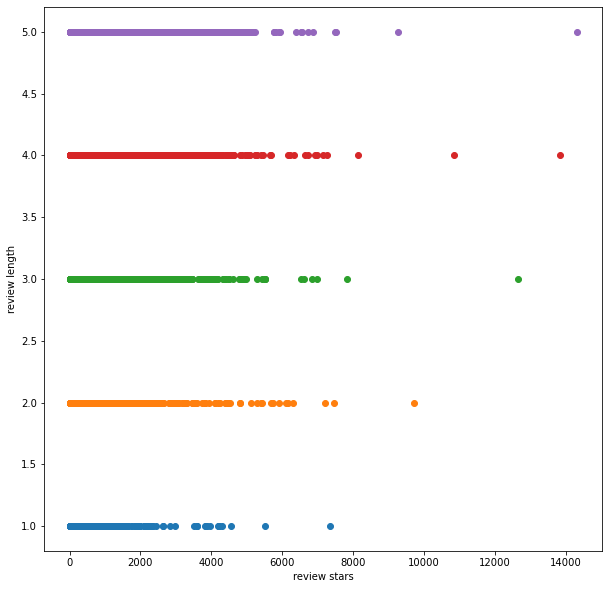

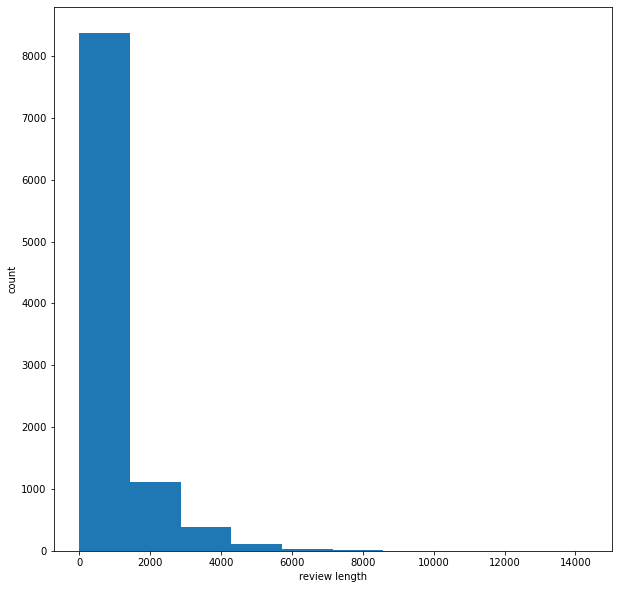

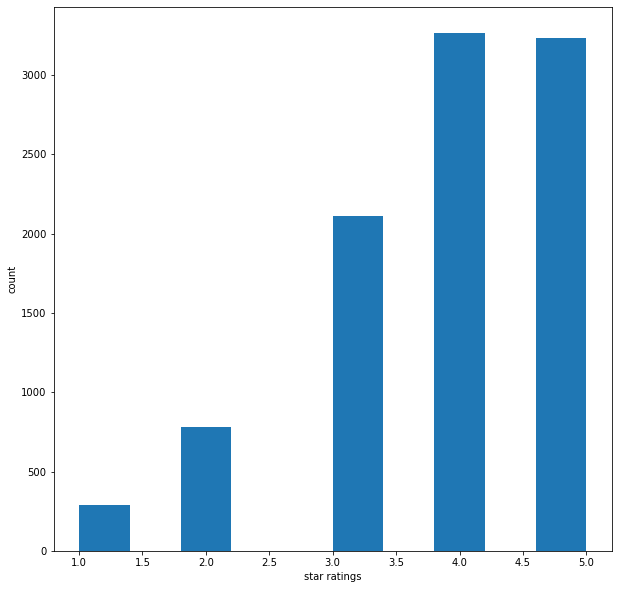

286
778
2113
3265
3232
14306


In [2]:
# PROBLEM 1
ones = []
twos = []
threes = []
fours = []
fives = []
stars = []
lens = []
for d in data:
    tmp = d['rating']
    tmp2 = len(d['review_text'])
    lens.append(tmp2)
    if tmp == 1.0:
        ones.append(tmp2)
        stars.append(tmp)
    elif tmp == 2.0:
        twos.append(tmp2)
        stars.append(tmp)
    elif tmp == 3.0:
        threes.append(tmp2)
        stars.append(tmp)
    elif tmp == 4.0:
        fours.append(tmp2)
        stars.append(tmp)
    elif tmp == 5.0:
        fives.append(tmp2)
        stars.append(tmp)
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(ones, [1]*len(ones))
plt.scatter(twos, [2]*len(twos))
plt.scatter(threes, [3]*len(threes))
plt.scatter(fours, [4]*len(fours))
plt.scatter(fives, [5]*len(fives))
plt.xlabel("review stars")
plt.ylabel("review length")
plt.show()
plt.hist(lens)
plt.xlabel("review length")
plt.ylabel("count")
plt.show()
plt.hist(stars)
plt.xlabel("star ratings")
plt.ylabel("count")
plt.show()
print(len(ones))
print(len(twos))
print(len(threes))
print(len(fours))
print(len(fives))
print(max(lens))

## Question 1
Review lengths are skewed right; shorter reviews are a lot more common. Four and five-star ratings are very common. There are 286 one star reviews, 778 two star reviews, 2113 three star reviews, 3265 four star reviews, and 3232 reviews.<br>
Review lengths generally remain the same regardless of the star rating. However, one-star reviews tend to be shorter than normal. As star rating increases the max review length also increases as well.

In [3]:
# PROBLEM 2
def feature(datum):
  feat = len(datum['review_text'])
  return [1] + [feat]
X = [feature(d) for d in data]
y = [d['rating'] for d in data]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)
print(theta)
est = []
act = []
for d in data:
    est.append(theta[0] + (theta[1] * len(d['review_text'])))
    act.append(d['rating'])
mse = numpy.square(numpy.subtract(act, est)).mean()
print(mse)

[3.68568136e+00 6.87371675e-05]
1.5522086622355378


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


## Question 2
θ0 = 3.68568136e+00, θ1 = 6.87371675e-05, MSE = 1.5522086622355378

In [4]:
# PROBLEM 3
def feature2(datum):
  feat = len(datum['review_text'])
  feat2 = datum['n_comments']
  return [1] + [feat] + [feat2]
X = [feature2(d) for d in data]
y = [d['rating'] for d in data]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)
print(theta)
est = []
act = []
for d in data:
    est.append(theta[0] + (theta[1] * len(d['review_text'])) + (theta[2] * d['n_comments']))
    act.append(d['rating'])
mse = numpy.square(numpy.subtract(act, est)).mean()
print(mse)

[ 3.68916737e+00  7.58407490e-05 -3.27928935e-02]
1.5498351692774581


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


## Question 3
θ0 = 3.68916737e+00, θ1 = 7.58407490e-05, θ2 = -3.27928935e-02, MSE = 1.5498351692774581<br>
The coefficient changed because since we added a new feature, we are refitting the line of best fit. Since the slope of the line has changed, it is probable that the coefficients for the line will change as well.

In [5]:
# PROBLEM 4
def feature3(datum):
  feat = len(datum['review_text']) / 14306
  feat2 = feat**2
  feat3 = feat**3
  feat4 = feat**4
  feat5 = feat**5
  return [1] + [feat] + [feat2] + [feat3] + [feat4] + [feat5]
X = [feature3(d) for d in data]
y = [d['rating'] for d in data]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)
print(theta)
est = []
act = []
for d in data:
    tmp = len(d['review_text'])/14306
    est.append(theta[0] + (theta[1]*tmp) + (theta[2]*(tmp**2)) + (theta[3]*(tmp**3)) + (theta[4]*(tmp**4)) + (theta[5]*(tmp**5)))
    act.append(d['rating'])
mse = numpy.square(numpy.subtract(act, est)).mean()
print(mse)

[  3.6441158    2.47396326  -5.65441081   5.55309592 -15.94637484
  14.68100179]
1.5496142023298694


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


Note: The same cell was modified in place to obtain all answers. It can be changed by modifying the return statement<br> for feature3() and the calculation for the est list.
## Question 4
First degree: MSE = 1.5522086622355378 <br>
Second degree: MSE = 1.5506567696339388 <br>
Third degree: MSE = 1.549798532380553 <br>
Fourth degree: MSE = 1.5496291324524716 <br>
Fifth degree: MSE = 1.5496142023298694

In [6]:
# PROBLEM 5
def feature4(datum):
  feat = len(datum['review_text']) / 14306
  #feat2 = feat**2
  #feat3 = feat**3
  #feat4 = feat**4
  #feat5 = feat**5
  return [1] + [feat]

numpy.random.shuffle(data)
training = data[0:5000]
test = data[5000:]
X = [feature4(d) for d in training]
y = [d['rating'] for d in training]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)
print(theta)
est = []
act = []
for d in training:
    tmp = len(d['review_text'])/14306
    est.append(theta[0] + (theta[1]*tmp))
    act.append(d['rating'])
mse = numpy.square(numpy.subtract(act, est)).mean()
print(mse)
est = []
act = []
for d in test:
    tmp = len(d['review_text'])/14306
    est.append(theta[0] + (theta[1]*tmp))
    act.append(d['rating'])
mse = numpy.square(numpy.subtract(act, est)).mean()
print(mse)

[3.71603048 0.72642314]
1.540797999894063
1.564814653517512


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


Note: The same cell above was used for all the calculations. This can be done by modifying feature4() and the equation<br> for the est list.
## Question 5
First degree: training_MSE = 1.5264141015373722, testing_MSE = 1.579022504546897 <br>
Second degree: training_MSE = 1.552113835072595, testing_MSE = 1.54935162662855<br>
Third degree: training_MSE = 1.5905966845592352, testing_MSE = 1.5127367243140475<br>
Fourth degree: training_MSE = 1.5102911578215517, testing_MSE = 1.589045193569622<br>
Fifth degree: training_MSE = 1.5216191744541196, testing_MSE = 1.5788753774635937

In [1]:
# Section 2: Classification
def parseData2(fname):
  for l in open(fname):
    yield eval(l)
data = list(parseData2("beer_50000.json"))

In [8]:
# Question 7
data2 = [d for d in data if 'user/gender' in d]
def feature5(datum):
  feat = len(datum['review/text'])
  return [1] + [feat]
X = [feature5(d) for d in data2]
y = [d['user/gender'] == 'Female' for d in data2]

In [9]:
# Logistic regression classifier
mod = linear_model.LogisticRegression(C=1.0)
mod.fit(X, y)

test_predictions = mod.predict(X)

In [10]:
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i, d in enumerate(test_predictions):
    if (d == True and y[i] == True):
        truepos += 1
    elif (d == True and y[i] == False):
        falsepos += 1
    elif (d == False and y[i] == False):
        trueneg += 1
    else:
        falseneg += 1
numpos = truepos + falseneg
numneg = trueneg + falsepos
print(truepos/numpos)
print(trueneg/numneg)
print(falsepos/(falsepos + trueneg))  # number of males we got wrong / total number of males
print(falseneg/(falseneg + truepos)) # number of females we got wrong / total number of females
print(1 - (0.5 * ((truepos/numpos) + (trueneg/numneg))))

0.0
1.0
0.0
1.0
0.5


## Question 7
True positive: 0.0<br>
True negative: 1.0<br>
False positive: 0.0<br>
False negative: 1.0<br>
Balanced error rate: 0.5

In [11]:
# Question 8
mod = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
mod.fit(X, y)
test_predictions = mod.predict(X)

In [12]:
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i, d in enumerate(test_predictions):
    if (d == True and y[i] == True):
        truepos += 1
    elif (d == True and y[i] == False):
        falsepos += 1
    elif (d == False and y[i] == False):
        trueneg += 1
    else:
        falseneg += 1
numpos = truepos + falseneg
numneg = trueneg + falsepos
print(truepos/numpos)
print(trueneg/numneg)
print(falsepos/(falsepos + trueneg))  # number of males we got wrong / total number of males
print(falseneg/(falseneg + truepos)) # number of females we got wrong / total number of females
print(1 - (0.5 * ((truepos/numpos) + (trueneg/numneg))))

0.6461038961038961
0.4191589947748196
0.5808410052251803
0.3538961038961039
0.4673685545606422


## Question 8
True positive: 0.6461038961038961<br>
True negative: 0.4191589947748196<br>
False positive: 0.5808410052251803<br>
False negative: 0.3538961038961039<br>
Balanced error rate: 0.4673685545606422

In [13]:
# Question 9
def feature6(datum):
  feat = len(datum['review/text'])
  feat2 = datum['review/text'].count(",")
  return [1] + [feat] + [feat2]
X = [feature6(d) for d in data2]
y = [d['user/gender'] == 'Female' for d in data2]

# Logistic regression classifier
mod = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
mod.fit(X, y)

test_predictions = mod.predict(X)
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i, d in enumerate(test_predictions):
    if (d == True and y[i] == True):
        truepos += 1
    elif (d == True and y[i] == False):
        falsepos += 1
    elif (d == False and y[i] == False):
        trueneg += 1
    else:
        falseneg += 1
numpos = truepos + falseneg
numneg = trueneg + falsepos
print(truepos/numpos)
print(trueneg/numneg)
print(falsepos/(falsepos + trueneg))  # number of males we got wrong / total number of males
print(falseneg/(falseneg + truepos)) # number of females we got wrong / total number of females
print(1 - (0.5 * ((truepos/numpos) + (trueneg/numneg))))

0.5357142857142857
0.5581487932321473
0.4418512067678527
0.4642857142857143
0.4530684605267835


## Question 9
BER: 0.4530684605267835<br>
I improved the model by adding the feature of counting how many commas are in the review, because I thought that <br>
females might write longer sentences with more punctuation.